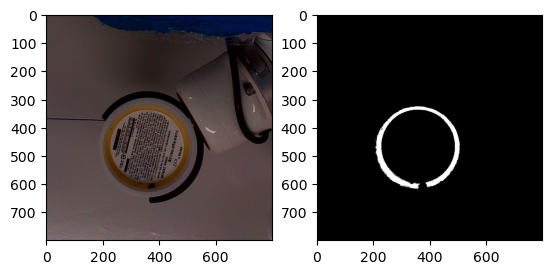

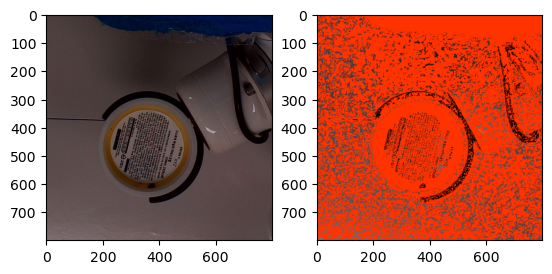

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('./aris_data/label_crop/IMG_20230601_203341.jpg')

# 이미지의 노랑색 계열 색상 픽셀 마스크 생성
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_yellow = (12, 160, 50)
upper_yellow = (18, 255, 130)
img_mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

# 출력
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(img_mask, cmap='gray')
plt.show()

# 생성한 픽셀 마스크 영역에 대하여 원본의 hsv 이미지에서 기존 s, v값은 유지하면서 h값을 6으로 변경


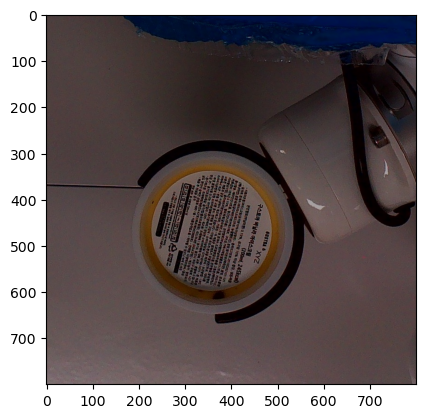

In [15]:
img = cv2.imread('./aris_data/label_crop/IMG_20230601_203341.jpg')
img_for_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(img_for_plt)
plt.show()

[ 16 194  84]
[ 15 249  86]


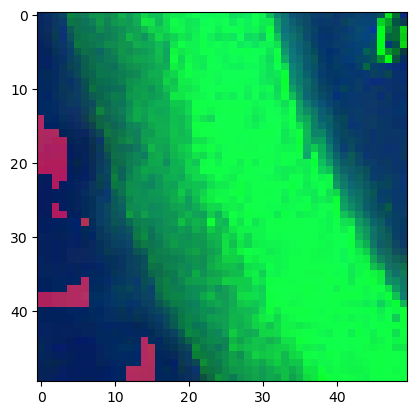

In [26]:
# hsv 변환
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 특정 픽셀값 출력
print(img_hsv[500, 215])
print(img_hsv[500, 225])

# 특정 영역 출력
img_crop = img_hsv[500:550, 200:250]
plt.imshow(img_crop)

In [22]:
# 허프 변환 원 검출
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
img_canny = cv2.Canny(img_blur, 100, 255)
circles = cv2.HoughCircles(img_canny, cv2.HOUGH_GRADIENT, 1, 50, param1=120, param2=30, minRadius=0, maxRadius=0)
for i in circles[0, :]:
    cv2.circle(img_for_plt, (i[0], i[1]), i[2], (255, 0, 0), 2)
    cv2.circle(img_for_plt, (i[0], i[1]), 2, (0, 0, 255), 5)
plt.imshow(img_for_plt)
plt.show()

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type


In [ ]:
src = cv2.imread('dial.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()
    
gray = cv2.cvtCplor(src, cv2.COLOR_BGR2GRAY)

# 블러를 통해 노이즈 제거
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)

# 트랙바 함수 정의
def on_trackbar(pos):
    # 트랙바 초기값 정보 받아오기
    rmin = cv2.getTrackbarPos('minRadius', 'img')
    rmax = cv2.getTrackbarPos('maxRadius', 'img')
    th = cv2.getTrackbarPos('threshold', 'img')
    
    # 받아온 정보를 cv2.HoughCircles에 입력
    circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                               parmam1=120, param2=th, minRadius=rmin, maxRadius=rmax)
    
    dst = src.copy() # 복사한 입력영상 위에 원 그리기
    if circles is not None:
        for i in range(circles.shape[1]) # 검출된 원 갯수만큼 반복
            cx, cy, radius = circles[0][i] # i번째 원에 데이터 저장
            cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA) # 저장된 데이터를 이용해 원 그리기
    
    cv2.imshow('img', dst)
    
# 트랙바 생성
cv2.imshow('img', src)

# 트랙바 범위
cv2.createTrackbar('minRadius', 'img', 0, 100, on_trackbar)
cv2.createTrackbar('maxRadius', 'img', 0, 150, on_trackbar)
cv2.createTrackbar('threshold', 'img', 0, 100, on_trackbar)

# 트랙바 초깃값
cv2.setTrackbarPos('minRadius', 'img', 10) # 초기값 10
cv2.setTrackbarPos('maxRadius', 'img', 80)
cv2.setTrackbarPos('threshold', 'img', 40)

cv2.waitKey()

cv2.destroyAllWindows()

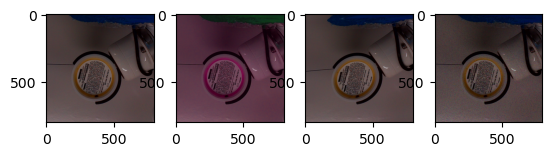

In [140]:
# albumentations 라이브러리를 이용한 이미지 증강
import albumentations as A
import cv2
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('./aris_data/label_crop/IMG_20230601_203341.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지 증강1
transform1 = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, always_apply=False, p=0.5),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, always_apply=False, p=0.5),
    A.RandomGamma(gamma_limit=(80, 120), always_apply=False, p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, always_apply=False, p=0.5),
    A.ChannelShuffle(always_apply=False, p=0.5)
])

# 이미지 증강2
transform2 = A.Compose([
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, approximate=False, p=0.5),
    A.GridDistortion(num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
    A.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.5, brightness_coeff=2.5, always_apply=False, p=0.5)
])

# 이미지 증강3
transform3 = A.Compose([
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, approximate=False, p=0.5),
    A.PixelDropout(always_apply=False, p=10, dropout_prob=0.07, per_channel=1, drop_value=(0, 0, 0), mask_drop_value=None),
    A.CoarseDropout(max_holes=20, max_height=100, max_width=100, min_holes=8, min_height=8, min_width=8, fill_value=0, always_apply=False, p=0.5)
])

# 이미지 증강 실행
transformed1 = transform1(image=img)
transformed_image1 = transformed1['image']
transformed2 = transform2(image=img)
transformed_image2 = transformed2['image']
transformed3 = transform3(image=img)
transformed_image3 = transformed3['image']

# 이미지 출력
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(transformed_image1)
plt.subplot(1, 4, 3)
plt.imshow(transformed_image2)
plt.subplot(1, 4, 4)
plt.imshow(transformed_image3)
plt.show()


In [6]:
import os
import albumentations as A
import cv2

class ImageAugmentor:
    def __init__(self, image_dir, save_dir):
        self.image_dir = image_dir
        self.save_dir = save_dir

    def augment_and_save(self, image_path):
        img = cv2.imread(image_path)
        
        filename = os.path.basename(image_path)
        
        # 이미지 증강1 
        transform1 = A.Compose([
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, always_apply=False, p=0.5),
            A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, always_apply=False, p=0.5),
            A.RandomGamma(gamma_limit=(80, 120), always_apply=False, p=0.5),
            A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=10, val_shift_limit=10, always_apply=False, p=0.5),
            A.ChannelShuffle(always_apply=False, p=0.5)
        ])

        # 이미지 증강2
        transform2 = A.Compose([
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, approximate=False, p=0.5),
            A.GridDistortion(num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
            A.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.5, brightness_coeff=2.5, always_apply=False, p=0.5)
        ])

        # 이미지 증강3
        transform3 = A.Compose([
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, approximate=False, p=0.5),
            A.PixelDropout(always_apply=False, p=10, dropout_prob=0.07, per_channel=1, drop_value=(0, 0, 0), mask_drop_value=None),
            A.CoarseDropout(max_holes=20, max_height=100, max_width=100, min_holes=8, min_height=8, min_width=8, fill_value=0, always_apply=False, p=0.5)
        ])
        
        augmented_images = []
        
        transformed1 = transform1(image=img)
        save_path1 = os.path.join(self.save_dir, 'aug1_'+filename)  
        cv2.imwrite(save_path1, transformed1['image'])
        augmented_images.append(transformed1['image'])
        
        transformed2 = transform2(image=img)
        save_path2 = os.path.join(self.save_dir, 'aug2_'+filename)
        cv2.imwrite(save_path2, transformed2['image'])
        augmented_images.append(transformed2['image'])
        
        transformed3 = transform3(image=img)
        save_path3 = os.path.join(self.save_dir, 'aug3_'+filename)
        cv2.imwrite(save_path3, transformed3['image'])
        augmented_images.append(transformed3['image'])
        
        save_path = os.path.join(self.save_dir, filename)
        cv2.imwrite(save_path, img)
        
        return augmented_images
        
        
    def run(self):
        image_paths = os.listdir(self.image_dir)
        
        for image_path in image_paths:
            full_path = os.path.join(self.image_dir, image_path)
            
            if os.path.isfile(full_path):
                print(f"Augmenting {image_path}")
                self.augment_and_save(full_path)
                
        print("Augmentation complete!")

augmentor = ImageAugmentor('./aris_data/label_crop/', './aris_data/label_crop_aug/')
augmentor.run()

Augmenting IMG_20230601_201548.jpg
Augmenting IMG_20230601_202212.jpg
Augmenting IMG_20230601_201507.jpg
Augmenting IMG_20230601_201940.jpg
Augmenting IMG_20230601_202202.jpg
Augmenting IMG_20230601_202239.jpg
Augmenting IMG_20230601_201955.jpg
Augmenting IMG_20230601_202244.jpg
Augmenting IMG_20230601_202131.jpg
Augmenting IMG_20230601_202147.jpg
Augmenting IMG_20230601_201804.jpg
Augmenting IMG_20230601_201630.jpg
Augmenting IMG_20230601_201800.jpg
Augmenting IMG_20230601_201642.jpg
Augmenting IMG_20230601_202159.jpg
Augmenting IMG_20230601_202231.jpg
Augmenting IMG_20230601_201856.jpg
Augmenting IMG_20230601_202014.jpg
Augmenting IMG_20230601_201823.jpg
Augmenting IMG_20230601_203316.jpg
Augmenting IMG_20230601_201455.jpg
Augmenting IMG_20230601_201503.jpg
Augmenting IMG_20230601_201748.jpg
Augmenting IMG_20230601_201611.jpg
Augmenting IMG_20230601_201516.jpg
Augmenting IMG_20230601_203247.jpg
Augmenting IMG_20230601_201450.jpg
Augmenting IMG_20230601_203310.jpg
Augmenting IMG_20230

In [2]:
import os
import albumentations as A
import cv2

class ImageAugmentor:
    def __init__(self, image_dir, save_dir):
        self.image_dir = image_dir
        self.save_dir = save_dir

    def augment_and_save(self, image_path):
        img = cv2.imread(image_path)
        
        filename = os.path.basename(image_path)
        
        # 이미지 증강1
        transform1 = A.Compose([
            A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=False, p=0.5),
            A.HorizontalFlip(always_apply=False, p=0.5),
        ])

        # 이미지 증강2
        transform2 = A.Compose([
            A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
            A.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=0.5),
        ])

        # 이미지 증강3
        transform3 = A.Compose([
            A.ToGray(always_apply=False, p=0.5),
        ])
        
        augmented_images = []
        
        transformed1 = transform1(image=img)
        save_path1 = os.path.join(self.save_dir, 'aug1_'+filename)  
        cv2.imwrite(save_path1, transformed1['image'])
        augmented_images.append(transformed1['image'])
        
        transformed2 = transform2(image=img)
        save_path2 = os.path.join(self.save_dir, 'aug2_'+filename)
        cv2.imwrite(save_path2, transformed2['image'])
        augmented_images.append(transformed2['image'])
        
        transformed3 = transform3(image=img)
        save_path3 = os.path.join(self.save_dir, 'aug3_'+filename)
        cv2.imwrite(save_path3, transformed3['image'])
        augmented_images.append(transformed3['image'])
        
        save_path = os.path.join(self.save_dir, filename)
        cv2.imwrite(save_path, img)
        
        return augmented_images
        
        
    def run(self):
        image_paths = os.listdir(self.image_dir)
        
        for image_path in image_paths:
            full_path = os.path.join(self.image_dir, image_path)
            
            if os.path.isfile(full_path):
                print(f"Augmenting {image_path}")
                self.augment_and_save(full_path)
                
        print("Augmentation complete!")

augmentor = ImageAugmentor('./aris_data/no_seal_crop/good/', './aris_data/no_seal_crop/good_aug/')
augmentor.run()

Augmenting IMG_20230601_202518.jpg
Augmenting IMG_20230601_203125.jpg
Augmenting IMG_20230601_202547.jpg
Augmenting IMG_20230601_203130.jpg
Augmenting IMG_20230601_202615.jpg
Augmenting IMG_20230601_202618.jpg
Augmenting IMG_20230601_203229.jpg
Augmenting IMG_20230601_203153.jpg
Augmenting IMG_20230601_203249.jpg
Augmenting IMG_20230601_202430.jpg
Augmenting IMG_20230601_202512.jpg
Augmenting IMG_20230601_202503.jpg
Augmenting IMG_20230601_202608.jpg
Augmenting IMG_20230601_202507.jpg
Augmenting IMG_20230601_203136.jpg
Augmenting IMG_20230601_203142.jpg
Augmenting IMG_20230601_203117.jpg
Augmenting IMG_20230601_203204.jpg
Augmenting IMG_20230601_203107.jpg
Augmenting IMG_20230601_202525.jpg
Augmenting IMG_20230601_202452.jpg
Augmenting IMG_20230601_203028.jpg
Augmenting IMG_20230601_202440.jpg
Augmenting IMG_20230601_203053.jpg
Augmenting IMG_20230601_202515.jpg
Augmenting IMG_20230601_202553.jpg
Augmenting IMG_20230601_202610.jpg
Augmenting IMG_20230601_203146.jpg
Augmenting IMG_20230